## 단어의 의미를 포착하는 수단인 단어 임베딩을 소개하고 이를 사용해 말뭉치에서 의미론적 유사성을 탐색한다.

## 임베딩
1. 단어 임베딩: 단일 단어에 대한 벡터이고, 문서 임베딩은 문서를 나타내는 벡터이다.
차원 d가 주어지면 의미가 유사한 단어가 유사한 벡터를 갖도록 단어에 대한 벡터

2. 문서 임베딩: 문서는 짧은 구, 문장, 단락 또는 긴 기사와 같이 단어의 시퀀스를 의미



## 단어 임베딩을 사용한 유추 추론
v(queen)-v(king) = v(woman)-v(man)

## 임베딩 유형
  - 젠심을 사용하면 Word2Vec 및 FastText 임베딩을 훈련할 수 있다. GloVe 임베딩은 유사성 쿼리에 사용할 수 있지만 젠심으로 훈련할 수는 없다.
  - GloVe:전역 동시 발생 행렬, Glove는 일반적으로 Word2Vec보다 성능이 더 좋지는 않지만, 훈련 데이터 및 작업에 따라 Word2Vec과 유사한 결과를 생성
  - FastText: 어휘에서 벗어난 단어를 처리하는 것. 모든 단어 벡터가 N-그램의 임베딩으로 구성된다. 그리고 대부분의 문자 N-gram에 임베딩이 있기 때문에 이전 모델에서 보지 못한 단어에서도 작동한다. 예를 들어, fasttext의 벡터는 일반적인 N-그램 때문에 fast 및 text와 유사하다. 따라서 FastText는 어휘에 맞지 않는 철자가 틀린 단어에 대한 임베딩을 찾는데 매우 유용
  -ELMo: 같은 컨텍스트화된 임베딩은 컨텍스트, 즉 앞,뒤 단어를 고려한다. 이는 조회 가능한 한 단어 벡터가 없다는 의미이다. ELMo는 다층 양방향 장단기 기억 신경망을 통해 전체문장을 전달하고 내부 계층의 가중치에서 각 단어에 대한 벡터를 조합한다.

In [1]:
# 사전 훈련된 모델에 유사한 질의 사용(이 임베딩은 누군가가 이미 위키백과 또는 뉴스 기사 같은 대규모 자료를 이용해 훈련을 두었다는 이점이다.)
import os
os.environ['GENSIM_DATA_DIR'] = './models'

In [2]:
import gensim.downloader as api
import pandas as pd
info_df = pd.DataFrame.from_dict(api.info()['models'], orient='index')
info_df[['file_size','base_dataset','parameters']].head(5)

,file_size,base_dataset,parameters
fasttext-wiki-news-subwords-300,1.005007e+09,"Wikipedia 2017, UMBC webbase corpus and statmt...",{'dimension': 300}
conceptnet-numberbatch-17-06-300,1.225498e+09,"ConceptNet, word2vec, GloVe, and OpenSubtitles...",{'dimension': 300}
word2vec-ruscorpora-300,2.084274e+08,Russian National Corpus (about 250M words),"{'dimension': 300, 'window_size': 10}"
word2vec-google-news-300,1.743564e+09,Google News (about 100 billion words),{'dimension': 300}
glove-wiki-gigaword-50,6.918254e+07,"Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)",{'dimension': 50}


In [3]:
model = api.load("glove-wiki-gigaword-50")

## 유사성 쿼리
  - 모델이 주어지면 king 같은 단일 단어에 대한 벡터는 model.wv['king'] 속성을 통해 간단하게 엑세스하거나 더 간단하게 바로 가기 model['king']을 통해 엑세스 할 수 있다.

In [4]:
v_king = model['king']
v_queen = model['queen']

print("Vector_size:", model.vector_size)
print("v_king =",v_king[:10])
print("v_queen =", v_queen[:10])
print("similarity:", model.similarity('king','queen'))

Vector_size: 50
v_king = [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]
v_queen = [ 0.37854   1.8233   -1.2648   -0.1043    0.35829   0.60029  -0.17538
  0.83767  -0.056798 -0.75795 ]
similarity: 0.78390425


In [5]:
# king과 가장 유사한 단어는 prince이고, queen은 둘째로 유사한 단어이다.
model.most_similar('king',topn=5)

[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721)]

In [6]:
#king이 queen과 유사하고, lion은 queen보다는 덜 유사하다.
v_lion = model['lion']
v_nano = model['nanotechnology']

model.cosine_similarities(v_king, [v_queen, v_lion, v_nano])

array([ 0.7839043 ,  0.47800118, -0.25490996], dtype=float32)

In [7]:
model.most_similar(positive=['woman','king'],negative=['man'],topn=5)

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904)]

In [8]:
model.most_similar(positive=['paris','germany'],negative=['france'], topn=5)

[('berlin', 0.9203965663909912),
 ('frankfurt', 0.8201637268066406),
 ('vienna', 0.8182448744773865),
 ('munich', 0.8152028918266296),
 ('hamburg', 0.7986699342727661)]

In [9]:
model.most_similar(positive=['france','capital'], topn=1)

[('paris', 0.7835100293159485)]

In [10]:
model.most_similar(positive=['greece','capital'], topn=5)

[('central', 0.7972515821456909),
 ('western', 0.7565553188323975),
 ('region', 0.7500612139701843),
 ('eastern', 0.7442947626113892),
 ('indonesia', 0.7436600923538208)]

## 임베딩의 품질
- 구글 뉴스 기사에서 훈련된 단어 임베딩조차 불안할 정도로 여성/남성 성별 고정관념을 나타낸다'라고 밝혔다.
- 임베딩의 품질은 최종 모델의 품질에 직접적인 영향을 미친다. 불행히도 머신러닝 알고리즘은 훈련 데이터에 존재하는 편향을 증폭시키는 경향이 있다. 이는 단어 임베딩에서도 마찬가지이다.

In [11]:
import requests
import sqlite3
import pandas as pd

# Step 1: 파일 다운로드
url = "https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/reddit-selfposts/reddit-selfposts-ch10.db"
output_file = "reddit-selfposts-ch10.db"

# 파일 다운로드
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(output_file, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f"File downloaded successfully and saved as '{output_file}'")
else:
    print(f"Failed to download file. HTTP Status Code: {response.status_code}")
    exit()

# Step 2: SQLite 파일 읽기
# SQLite 연결
conn = sqlite3.connect(output_file)

# 데이터베이스의 테이블 이름 확인
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tables in the database:", tables)

# Step 3: 테이블 데이터를 DataFrame으로 변환
# 예시: 첫 번째 테이블의 이름을 가져와 데이터를 읽어옴
if not tables.empty:
    table_name = tables['name'][0]  # 첫 번째 테이블 이름
    print(f"Reading data from table: {table_name}")
    df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)
    print(df.head())  # 데이터의 첫 5행 출력
else:
    print("No tables found in the database.")

# 연결 닫기
conn.close()


File downloaded successfully and saved as 'reddit-selfposts-ch10.db'
Tables in the database:         name
0  posts_nlp
Reading data from table: posts_nlp
    subreddit                                             lemmas  \
0      Harley  Club color funny story go to college in Las Ve...   
1     Mustang  Roush vs Shleby GT500 be try determine be fast...   
2  Volkswagen  2001 Golf Wagon look for insight hello try fin...   
3       Lexus  be 250 Coolant Flush Change _url_ have IS 250 ...   
4        volt  Gen1 mpg w/ dead battery hi new to subreddit b...   

                                                text  
0  No Club Colors: Funny story. I went to college...  
1  Roush vs Shleby GT500: I am trying to determin...  
2  2001 Golf Wagon looking for some insight: Hell...  
3  IS 250 Coolant Flush/Change: _URL_ I have a IS...  
4  Gen1 mpg w/ dead battery?: Hi, new to this sub...  


In [12]:
df['lemmas'] =df['lemmas'].str.lower().str.split()
sents = df['lemmas']

In [13]:
sents

,lemmas
0,"[club, color, funny, story, go, to, college, i..."
1,"[roush, vs, shleby, gt500, be, try, determine,..."
2,"[2001, golf, wagon, look, for, insight, hello,..."
3,"[be, 250, coolant, flush, change, _url_, have,..."
4,"[gen1, mpg, w/, dead, battery, hi, new, to, su..."
...,...
19995,"[bilstein, shocks, read, lot, forum, and, peop..."
19996,"[question, on, potential, purchase, of, crashe..."
19997,"[got, first, warning, light, on, dash, husband..."
19998,"[is, model, avoid, be, look, at, get, use, lex..."


### Word2Vec에서는 기본적으로 두 단어 발생 사이의 통계적 의존성을 측정하는 PMI를 기반으로 간단하지만 효과적인 알고리즘을 사용

### 현재 훈련 중인 모델을 위해서 보다 강력한 결과를 제공하는 NPMI라는 고급 알고리즘을 사용. 이 알고리즘은 -1에서 +1까지로 제한된 값 범위를 감안할 때 조정하기도 더 쉽다. 초기 실행에서 NPMI의 임계값은 0.3이라는 다소 낮은 값으로 설정되어 있다.

In [14]:
from gensim.models.phrases import Phrases, npmi_scorer
phrases = Phrases(sents, min_count=10, threshold=0.3, delimiter='-', scoring=npmi_scorer)

In [15]:
sent = "I had to replace the timing belt in my mercedes c300".split()
phrased = phrases[sent]
print("|".join(phrased))

I|had|to|replace|the|timing-belt|in|my|mercedes-c300


In [16]:
import gensim
# solved compatibility issue for Gensim 4.x
if gensim.__version__[0] > '3': # gensim 4.x - find_phrases / string phrases

    phrase_df = pd.DataFrame(phrases.find_phrases(sents),
                             columns =['phrase', 'score'])
    phrase_df = pd.DataFrame.from_dict(phrases.find_phrases(sents), orient='index').reset_index()
    phrase_df.columns = ['phrase', 'score']
    phrase_df = phrase_df[['phrase', 'score']].drop_duplicates() \
            .sort_values(by='score', ascending=False).reset_index(drop=True)

else: # gensim 3.x - export_phrases / byte phrases
    phrase_df = pd.DataFrame(phrases.export_phrases(sents, out_delimiter=delim),
                             columns =['phrase', 'score'])
    phrase_df = phrase_df[['phrase', 'score']].drop_duplicates() \
        .sort_values(by='score', ascending=False).reset_index(drop=True)
    phrase_df['phrase'] = phrase_df['phrase'].map(lambda p: p.decode('utf-8'))

In [17]:
phrase_df[phrase_df['phrase'].str.contains('mercedes')]

,phrase,score
83,mercedes-benz,0.796934
1416,mercedes-c300,0.472765


In [18]:
phrases = Phrases(sents, min_count=10, threshold=0.7, delimiter='-', scoring=npmi_scorer)

df['phrased_lemmas'] = df['lemmas'].map(lambda s: phrases[s])
sents = df['phrased_lemmas']

In [19]:
from gensim.models import Word2Vec
model = Word2Vec(sents, # 토큰화된 입력 문장들
                 vector_size=100, # 단어 벡터의 크기 (기본 100차원)
                 window=2, # 컨텍스트 윈도우 크기(기본 5)
                 sg=1, # skip-gram 사용(기본 0 == CBOW)
                 negative=5, # negative 샘플의 수 (기본 5)
                 min_count=5, # 단어의 최소 발생 횟수 그 이하면 무시 (기본5)
                 workers=4, # 스레드 수 (기본 3)
                 epochs=5) # 에폭 수 (기본5)

In [20]:
from gensim.models import Word2Vec, FastText
import numpy as np
model_path = './models'
model_prefix = 'autos'

param_grid = {'w2v': {'variant': ['cbow', 'sg'], 'window': [2, 5, 30]},
              'ft': {'variant': ['sg'], 'window': [5]}}
size = 100

for algo, params in param_grid.items():
    print(algo) ###
    for variant in params['variant']:
        sg = 1 if variant == 'sg' else 0
        for window in params['window']:
            print(f"  Variant: {variant}, Window: {window}, Size: {size}") ###
            np.random.seed(1) ### to ensure repeatability
            if algo == 'w2v':
                model = Word2Vec(sents, vector_size=size, window=window, sg=sg)
            else:
                model = FastText(sents, vector_size=size, window=window, sg=sg)

            file_name = f"{model_path}/{model_prefix}_{algo}_{variant}_{window}"
            model.wv.save_word2vec_format(file_name + '.bin', binary=True)

w2v
  Variant: cbow, Window: 2, Size: 100
  Variant: cbow, Window: 5, Size: 100
  Variant: cbow, Window: 30, Size: 100
  Variant: sg, Window: 2, Size: 100
  Variant: sg, Window: 5, Size: 100
  Variant: sg, Window: 30, Size: 100
ft
  Variant: sg, Window: 5, Size: 100


In [21]:
from gensim.models import keyedvectors
from gensim.models import KeyedVectors
names = ['autos_w2v_cbow_2', 'autos_w2v_sg_2',
         'autos_w2v_sg_5','autos_w2v_sg_30', 'autos_ft_sg_5']

models = {}

for name in names:
    file_name = f"{model_path}/{name}.bin"
    print(f"Loading {file_name}") ###
    models[name] = KeyedVectors.load_word2vec_format(file_name, binary=True)

Loading ./models/autos_w2v_cbow_2.bin
Loading ./models/autos_w2v_sg_2.bin
Loading ./models/autos_w2v_sg_5.bin
Loading ./models/autos_w2v_sg_30.bin
Loading ./models/autos_ft_sg_5.bin


In [22]:
def compare_models(models, **kwargs):
  df = pd. DataFrame()
  for name, model in models:
    df[name] = [f"{word} {score: 3f}"
                for word, score in model.most_similar(**kwargs)]
    df.index = df.index + 1
    return df

In [23]:
compare_models([(n, models[n]) for n in names], positive='bmw', topn=10) # bmw와 가장 유사한 단어가 어느 것인지 확인

,autos_w2v_cbow_2
1,mercedes 0.881169
2,lexus 0.815280
3,volvo 0.807907
4,subaru 0.796374
5,porsche 0.782963
6,volkswagen 0.776860
7,vw 0.775654
8,benz 0.770730
9,harley 0.769536
10,mb 0.765787


In [24]:
compare_models([(n, models[n]) for n in names],
               positive=['f150','toyota'], negative=['ford'], topn=5).T #f-150 픽업 트럭과 비슷한 제품

,1,2,3,4,5
autos_w2v_cbow_2,f-150 0.859215,s80 0.809208,gmc-sierra 0.806086,civic-si 0.806069,328i 0.798366


## 임베딩 시각화를 위한 전략
   - 단어 임베딩을 기반으로 말뭉치를 탐색하면 전체 개념이 본질적으로 모호하기 때문에 실제 유사도 점수에는 관심이 없다.

## 전략: 차원축소 적용
  - 고차원 벡터는 데이터를 2차원 또는 3차원으로 투영해 시각화 한다. 투영이 잘 작동하면 관련 용어 클러스터를 시각적으로 인식하고 말뭉치의 의미 개념을 훨씬 더 깊이 이해가 가능

## 차원 축소 기법
 - 1. PCA(주성분 분석): 데이터의 대부분의 분산이 보존되도록 데이터의 선형 투영을 수행한다. 공분산 행렬의 가장 큰 고윳값의 고유벡터를 기반으로 한다. PCA의 하이퍼파라미터는 대상공간의 차원 수이다.

 - 2. t-SNE 및 UMAP 같은 비선형 알고리즘은 매핑에서 로컬 및 전역 측면의 균형을 유지하려고 한다.

In [25]:
from umap import UMAP

model = models['autos_w2v_sg_30']
words = model.index_to_key
wv = [model[word] for word in words]

reducer = UMAP(n_components=2, metric='cosine', n_neighbors=15, min_dist=0.1,random_state=12)
reduced_wv = reducer.fit_transform(wv)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [26]:
import plotly.express as px

plot_df = pd.DataFrame(reduced_wv, columns=['x','y'])
plot_df['word'] = words
params = {'hover_data': {c: False for c in plot_df.columns},
          'hover_name': 'word'}

fig = px.scatter(plot_df, x='x', y='y', opacity=0.3, size_max=3, **params)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



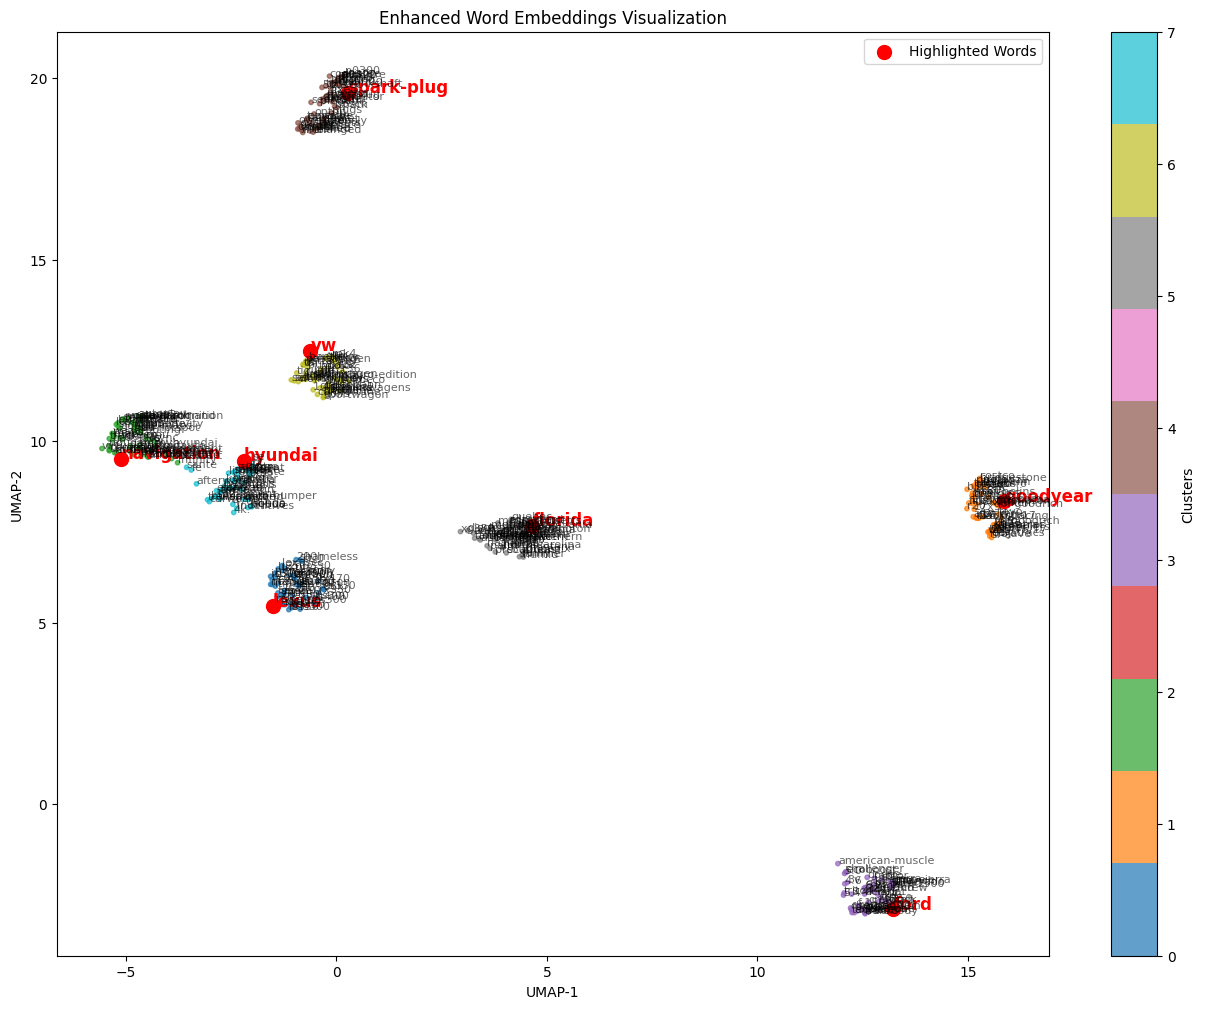

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import KMeans

def plot_embeddings(model, search, topn=50, show_all=True, labels=False,
                    n_neighbors=15, min_dist=0.1, random_state=12, metric='cosine', num_clusters=5):
    """
    Enhanced embedding visualization with clustering and color separation.
    """
    vectors = []
    words = []
    highlighted_vectors = []
    highlighted_words = []

    # Retrieve vectors and words for the search terms and their most similar words
    for word in search:
        if word in model:
            similar_words = model.most_similar(word, topn=topn)
            highlighted_words.append(word)
            highlighted_vectors.append(model[word])
            if show_all:
                words.extend([w for w, _ in similar_words])
                vectors.extend([model[w] for w, _ in similar_words])

    vectors = np.array(vectors)
    highlighted_vectors = np.array(highlighted_vectors)

    # Reduce dimensionality using UMAP
    reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state)
    reduced_vectors = reducer.fit_transform(vectors)
    reduced_highlighted_vectors = reducer.transform(highlighted_vectors)

    # Clustering for visualization
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(reduced_vectors)

    # Plot the results
    plt.figure(figsize=(16, 12))
    scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=cluster_labels, cmap='tab10', s=10, alpha=0.7)
    plt.colorbar(scatter, label="Clusters")

    # Highlight searched words
    plt.scatter(reduced_highlighted_vectors[:, 0], reduced_highlighted_vectors[:, 1],
                color='red', s=100, label='Highlighted Words')

    if labels:
        # Add cluster labels at cluster centers
        for i, word in enumerate(highlighted_words):
            plt.text(reduced_highlighted_vectors[i, 0], reduced_highlighted_vectors[i, 1],
                     word, fontsize=12, color='red', weight='bold')

        # Add individual word labels for all points
        for i, word in enumerate(words):
            plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1],
                     word, fontsize=8, alpha=0.6)

    plt.title("Enhanced Word Embeddings Visualization")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.legend()
    plt.show()

# Example usage
plot_embeddings(
    model=models['autos_w2v_sg_30'],
    search=['ford', 'lexus', 'vw', 'hyundai', 'goodyear', 'spark-plug', 'florida', 'navigation'],
    topn=50,
    show_all=True,
    labels=True,  # Enable labels
    n_neighbors=15,
    min_dist=0.1,
    random_state=12,
    metric='cosine',
    num_clusters=8  # Number of clusters
)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



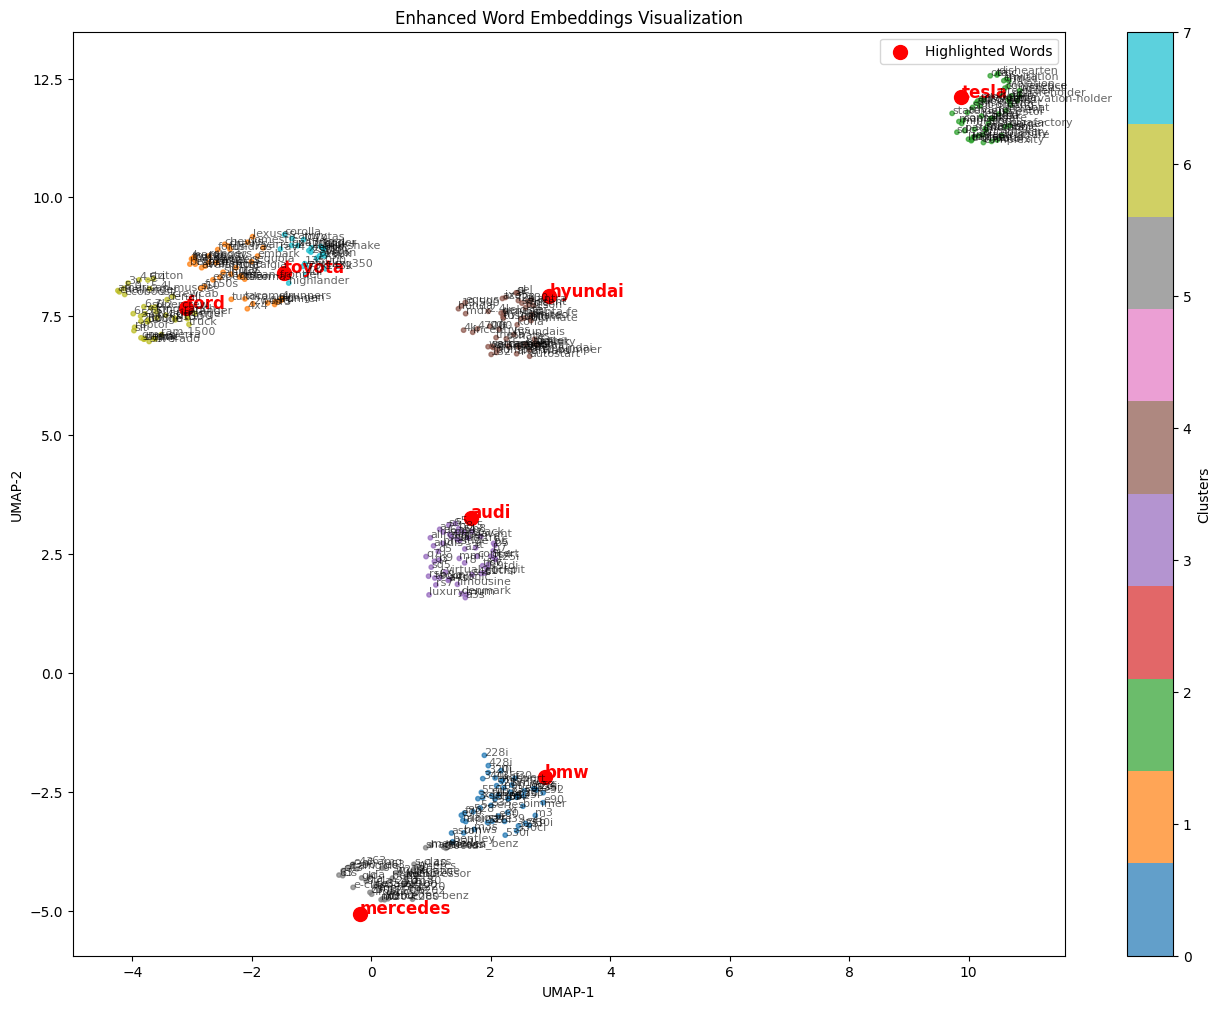

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import KMeans

def plot_embeddings(model, search, topn=10, show_all=False, labels=True,
                    n_neighbors=15, min_dist=10, random_state=12, metric='cosine', num_clusters=5,algo='umap'):
    """
    Enhanced embedding visualization with clustering and color separation.
    """
    vectors = []
    words = []
    highlighted_vectors = []
    highlighted_words = []

    # Retrieve vectors and words for the search terms and their most similar words
    for word in search:
        if word in model:
            similar_words = model.most_similar(word, topn=topn)
            highlighted_words.append(word)
            highlighted_vectors.append(model[word])
            if show_all:
                words.extend([w for w, _ in similar_words])
                vectors.extend([model[w] for w, _ in similar_words])

    vectors = np.array(vectors)
    highlighted_vectors = np.array(highlighted_vectors)

    # Reduce dimensionality using UMAP
    reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state)
    reduced_vectors = reducer.fit_transform(vectors)
    reduced_highlighted_vectors = reducer.transform(highlighted_vectors)

    # Clustering for visualization
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(reduced_vectors)

    # Plot the results
    plt.figure(figsize=(16, 12))
    scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=cluster_labels, cmap='tab10', s=10, alpha=0.7)
    plt.colorbar(scatter, label="Clusters")

    # Highlight searched words
    plt.scatter(reduced_highlighted_vectors[:, 0], reduced_highlighted_vectors[:, 1],
                color='red', s=100, label='Highlighted Words')

    if labels:
        # Add cluster labels at cluster centers
        for i, word in enumerate(highlighted_words):
            plt.text(reduced_highlighted_vectors[i, 0], reduced_highlighted_vectors[i, 1],
                     word, fontsize=12, color='red', weight='bold')

        # Add individual word labels for all points
        for i, word in enumerate(words):
            plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1],
                     word, fontsize=8, alpha=0.6)

    plt.title("Enhanced Word Embeddings Visualization")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.legend()
    plt.show()

# Example usage
plot_embeddings(
    model=models['autos_w2v_sg_30'],
    search=['ford', 'bmw', 'toyota', 'tesla', 'audi', 'mercedes', 'hyundai'],
    topn=50,
    show_all=True,
    labels=True,  # Enable labels
    n_neighbors=15,
    min_dist=0.1,
    random_state=12,
    metric='cosine',
    num_clusters=8  # Number of clusters
)


In [29]:
import csv

model_path = './models' ###
name = 'autos_w2v_sg_30'
model = models[name]

with open(f'{model_path}/{name}_words.tsv', 'w', encoding='utf-8') as tsvfile:
    tsvfile.write('\n'.join(model.index_to_key))

with open(f'{model_path}/{name}_vecs.tsv', 'w', encoding='utf-8') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t',
                        dialect=csv.unix_dialect, quoting=csv.QUOTE_MINIMAL)
    for w in model.index_to_key:
        _ = writer.writerow(model[w].tolist())

## 유사성 트리 구성
  - 단어는 그래프의 노드를 나타내며 두 노드가 '매우' 유사할 때마다 간선이 생성된다. '매우'의 기준은 상위 n개의 가장 유사한 이웃에 있는 노드 또는 유사성 점수의 임계값이 될 수 있다. 그러나 한 단어의 주변에 있는 대부분의 단어는 그 한 단어와 유사할 뿐만 아니라 주변 단어들끼리도 유사하다.

  - sim_tree: 상위 n개의 가장 유사한 이웃을 찾아 해당 간선과 함께 그래프에 추가한다.  그런 다음 루트 노드까지 최대 거리에 도달할 때까지 새로  발견된 각각의 이웃과 이웃에 대해 동일한 작업을 수행

In [30]:
import networkx as nx
from collections import deque

def sim_tree(model, word, top_n, max_dist):
  graph = nx.Graph()
  graph.add_node(word, dist=0)
  to_visit =deque([word])
  while len(to_visit) > 0:
    source = to_visit.popleft()
    dist = graph.nodes[source]['dist']+1

    if dist <= max_dist: # discover new nodes
            for target, sim in model.most_similar(source, topn=top_n):
                if target not in graph:
                    to_visit.append(target)
                    graph.add_node(target, dist=dist)
                    graph.add_edge(source, target, sim=sim, dist=dist)
    return graph

In [31]:
from networkx.drawing.nx_pydot import graphviz_layout

def plot_tree(graph, node_size=1000, font_size=12):
    #graph = solve_graphviz_problems(graph) ###

    pos = graphviz_layout(graph, prog='twopi', root=list(graph.nodes)[0])
    #plt.figure(figsize=(10, 4), dpi=200) ###
    #plt.grid(b=None) ### hide box
    #plt.box(False) ### hide grid
    #plt_add_margin(pos) ### just for layout

    colors = [graph.nodes[n]['dist'] for n in graph] # colorize by distance
    nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color=colors,
                           cmap='Set1', alpha=0.4)
    nx.draw_networkx_labels(graph, pos, font_size=font_size)
    #scale_weights(graph) ### not in book

    for (n1, n2, sim) in graph.edges(data='sim'):
         nx.draw_networkx_edges(graph, pos, [(n1, n2)], width=sim, alpha=0.2)

    plt.show()

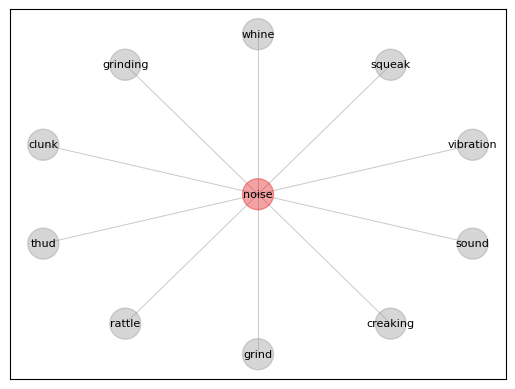

In [32]:
# noise와 유사도가 높은 단어 10개를 찾고, 이렇게 찾은 유사어와 유사한 단어를 10개씩 찾은 뒤, 새로 찾은 유사어와 유사한 단어 10개씩 찾는과정을 총 3회 반복
model = models['autos_w2v_sg_2']
graph = sim_tree(model, 'noise', top_n=10, max_dist=3)
plot_tree(graph, node_size=500, font_size=8)

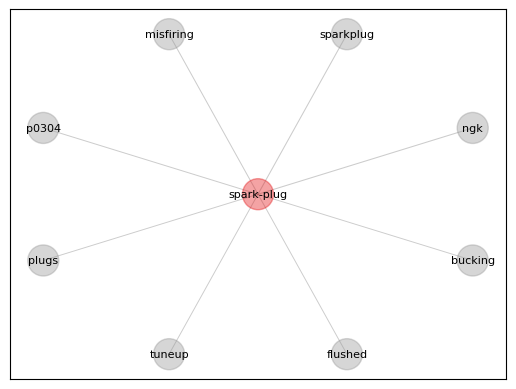

In [33]:
model = models['autos_w2v_sg_30']
graph = sim_tree(model, 'spark-plug', top_n=8, max_dist=2)
plot_tree(graph, node_size=500, font_size=8)